In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
status = pd.read_csv('/home/kyohei/bike_share_data/201608_status_data.csv')

In [3]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35517185 entries, 0 to 35517184
Data columns (total 4 columns):
station_id         int64
bikes_available    int64
docks_available    int64
time               object
dtypes: int64(3), object(1)
memory usage: 1.1+ GB


# スタートが多いステーション
- 70,San Francisco Caltrain
- 69,San Francisco Caltrain 2
- 50,Harry Bridges Plaza

In [4]:
status_start_high_SFC = status[status.station_id==70]
status_start_high_SFC2 = status[status.station_id==69]
#status_start_high_hbp = status[status.station_id==50]

# スタートが平均的なステーション
- 51,Embarcadero as Folsom
- 62,2nd as Folsom
- 56,Beale as Market

In [5]:
status_start_mid_EF = status[status.station_id==51]
#status_start_mid_2F = status[status.station_id==62]
#status_start_mid_BM = status[status.station_id==50]

# スタートが少ないステーション
- 91,Cyril Magnin St as Ellis St
- 90,5th St as Folsom St
- 58,San Francisco City Hall

In [6]:
status_start_low_SFCH = status[status.station_id==58]

# 返却が多いステーション
- スタートが多い場合と一緒なので省略

# 返却が平均的なステーション
- 51,Embarcadero as Folsom←スタートが平均的な時と一緒
- 64,2nd at South Park
- 39,Powell Street BART

# スタートが少ないステーション
- スタートの場合と一緒なので省略

In [9]:
status_start_high_SFC.time = status_start_high_SFC.time.apply(lambda x:pd.to_datetime(x))

/home/kyohei/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [11]:
import datetime
#曜日
status_start_high_SFC['dayofweek'] = status_start_high_SFC.time.apply(lambda x:x.dayofweek)
#時間
status_start_high_SFC['hour_minute'] = status_start_high_SFC.time.apply(lambda x:datetime.time(x.time().hour,x.time().minute))

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
station = pd.read_csv('/home/kyohei/bike_share_data/201608_station_data.csv')

In [39]:
status_start_high_SFC['op_rate_bikes'] = status_start_high_SFC.bikes_available / station[station['station_id']==70]['dockcount'].values
status_start_high_SFC['op_rate_docks'] = status_start_high_SFC.docks_available / station[station['station_id']==70]['dockcount'].values

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [31]:
status_start_high_SFC.head()

,station_id,bikes_available,docks_available,time,dayofweek,hour_minute,op_rate_bikes,op_rate_docks
29412951,70,15,4,2015-09-01 00:00:02,1,00:00:00,0.214286,0.057143
29412952,70,15,4,2015-09-01 00:01:02,1,00:01:00,0.214286,0.057143
29412953,70,15,4,2015-09-01 00:02:02,1,00:02:00,0.214286,0.057143
29412954,70,15,4,2015-09-01 00:03:03,1,00:03:00,0.214286,0.057143
29412955,70,15,4,2015-09-01 00:04:02,1,00:04:00,0.214286,0.057143


In [43]:
#平均的振る舞い
acerage_behavior_bikes_SFC = pd.DataFrame(status_start_high_SFC.groupby(['dayofweek','hour_minute'])['op_rate_bikes'].mean()).reset_index()
acerage_behavior_docks_SFC = pd.DataFrame(status_start_high_SFC.groupby(['dayofweek','hour_minute'])['op_rate_docks'].mean()).reset_index()

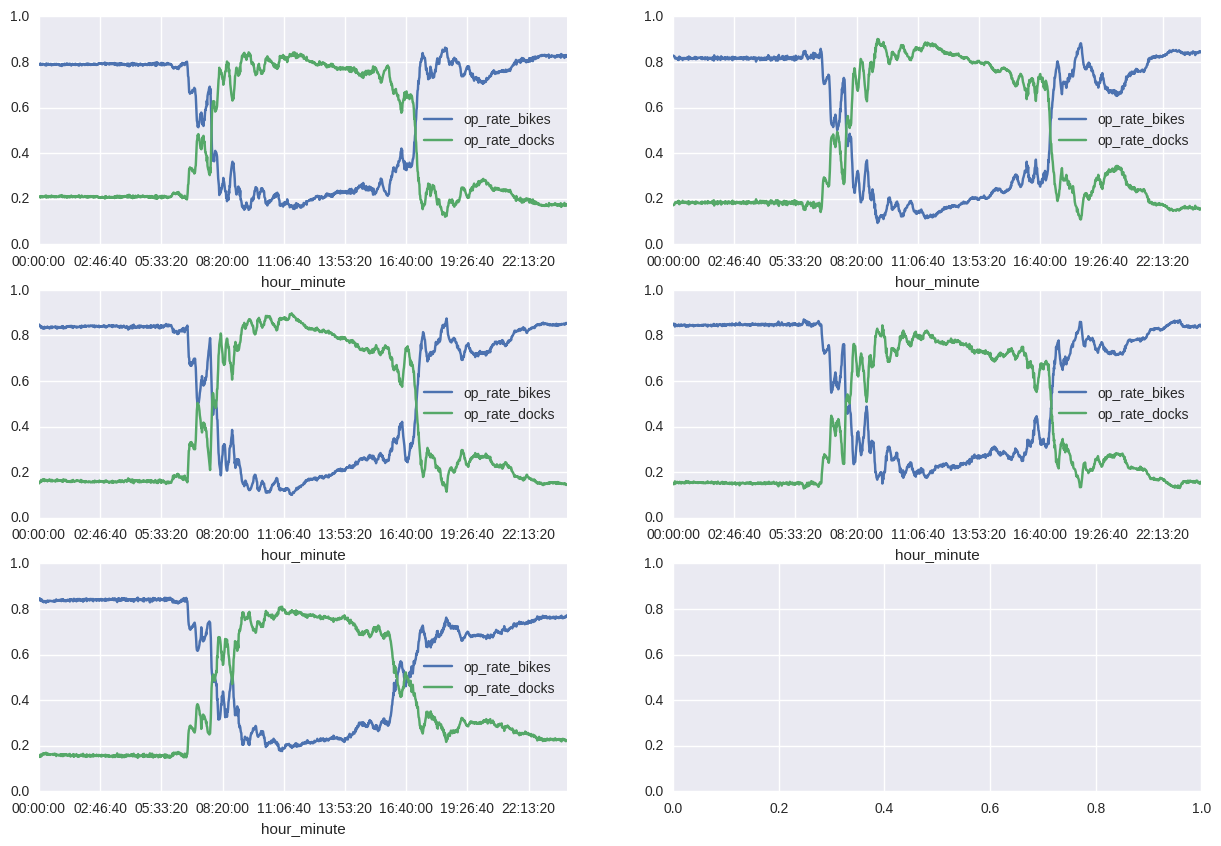

In [52]:
fig, axes = plt.subplots(3,2,figsize=(15,10))
dayofweeks = [0,1,2,3,4]
targets = zip(dayofweeks,axes.flatten())
for (dayofweek,ax) in targets:
    acerage_behavior_bikes_SFC[acerage_behavior_bikes_SFC.dayofweek==dayofweek].plot('hour_minute','op_rate_bikes',ax=ax)
    acerage_behavior_docks_SFC[acerage_behavior_docks_SFC.dayofweek==dayofweek].plot('hour_minute','op_rate_docks',ax=ax)
    ax.set_ylim([0,1])

In [54]:
status_start_high_SFC['Date'] = status_start_high_SFC['time'].apply(lambda x:x.date())

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [56]:
status_start_high_SFC.head()

,station_id,bikes_available,docks_available,time,dayofweek,hour_minute,op_rate_bikes,op_rate_docks,Date
29412951,70,15,4,2015-09-01 00:00:02,1,00:00:00,0.789474,0.210526,2015-09-01
29412952,70,15,4,2015-09-01 00:01:02,1,00:01:00,0.789474,0.210526,2015-09-01
29412953,70,15,4,2015-09-01 00:02:02,1,00:02:00,0.789474,0.210526,2015-09-01
29412954,70,15,4,2015-09-01 00:03:03,1,00:03:00,0.789474,0.210526,2015-09-01
29412955,70,15,4,2015-09-01 00:04:02,1,00:04:00,0.789474,0.210526,2015-09-01


In [61]:
#ある一週間
any_data = status_start_high_SFC[(status_start_high_SFC.Date>=datetime.date(2015,9,14)) & (status_start_high_SFC.Date<=datetime.date(2015,9,18))]

In [62]:
any_data.head()

,station_id,bikes_available,docks_available,time,dayofweek,hour_minute,op_rate_bikes,op_rate_docks,Date
29431671,70,12,7,2015-09-14 00:00:02,0,00:00:00,0.631579,0.368421,2015-09-14
29431672,70,12,7,2015-09-14 00:01:03,0,00:01:00,0.631579,0.368421,2015-09-14
29431673,70,12,7,2015-09-14 00:02:02,0,00:02:00,0.631579,0.368421,2015-09-14
29431674,70,12,7,2015-09-14 00:03:02,0,00:03:00,0.631579,0.368421,2015-09-14
29431675,70,12,7,2015-09-14 00:04:02,0,00:04:00,0.631579,0.368421,2015-09-14


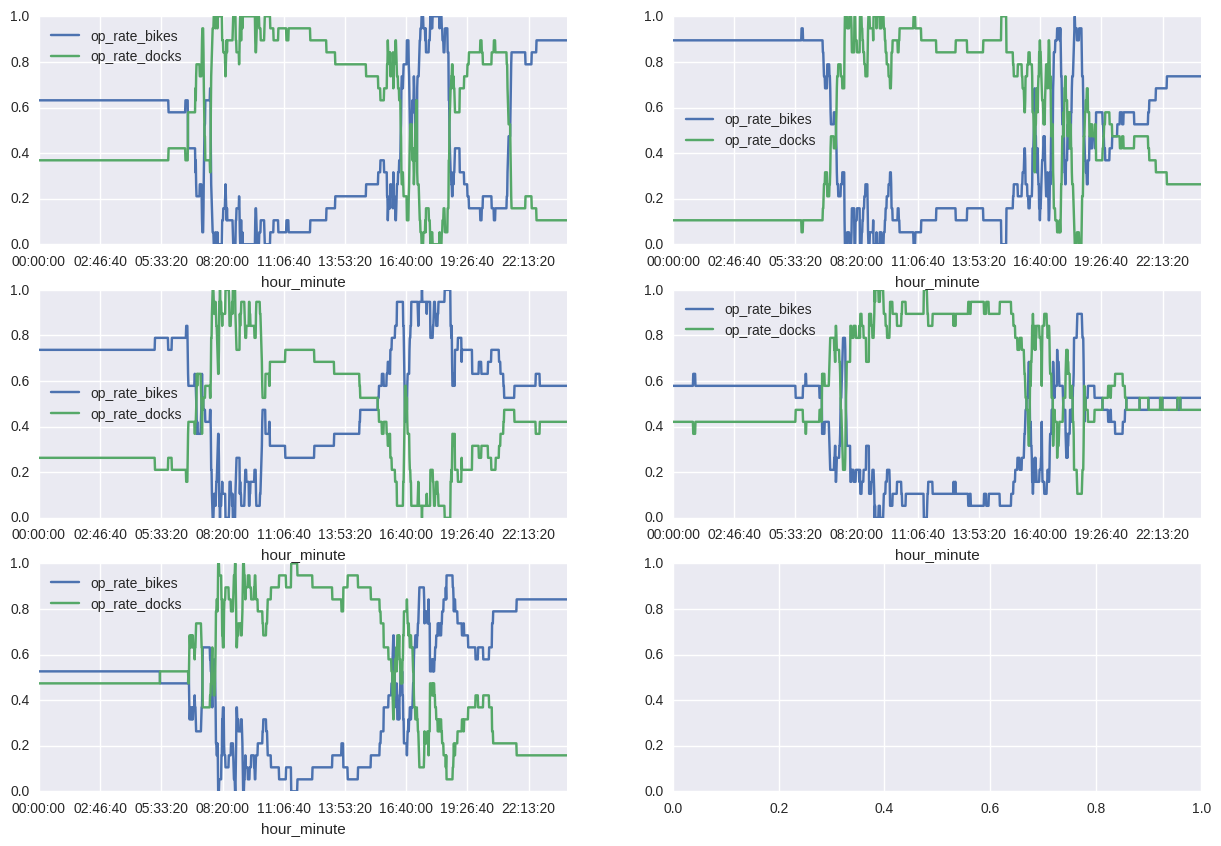

In [64]:
fig, axes = plt.subplots(3,2,figsize=(15,10))
dayofweeks = [0,1,2,3,4]
targets = zip(dayofweeks,axes.flatten())
for (dayofweek,ax) in targets:
    any_data[any_data.dayofweek==dayofweek].plot('hour_minute','op_rate_bikes',ax=ax)
    any_data[any_data.dayofweek==dayofweek].plot('hour_minute','op_rate_docks',ax=ax)

# スタートが少ない

In [65]:
status_start_low_SFCH.time = status_start_low_SFCH.time.apply(lambda x:pd.to_datetime(x))

In [66]:
import datetime
#曜日
status_start_low_SFCH['dayofweek'] = status_start_low_SFCH.time.apply(lambda x:x.dayofweek)
#時間
status_start_low_SFCH['hour_minute'] = status_start_low_SFCH.time.apply(lambda x:datetime.time(x.time().hour,x.time().minute))

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [67]:
status_start_low_SFCH['op_rate_bikes'] = status_start_low_SFCH.bikes_available / station[station['station_id']==58]['dockcount'].values
status_start_low_SFCH['op_rate_docks'] = status_start_low_SFCH.docks_available / station[station['station_id']==58]['dockcount'].values

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [68]:
status_start_high_SFC.head()

,station_id,bikes_available,docks_available,time,dayofweek,hour_minute,op_rate_bikes,op_rate_docks,Date
29412951,70,15,4,2015-09-01 00:00:02,1,00:00:00,0.789474,0.210526,2015-09-01
29412952,70,15,4,2015-09-01 00:01:02,1,00:01:00,0.789474,0.210526,2015-09-01
29412953,70,15,4,2015-09-01 00:02:02,1,00:02:00,0.789474,0.210526,2015-09-01
29412954,70,15,4,2015-09-01 00:03:03,1,00:03:00,0.789474,0.210526,2015-09-01
29412955,70,15,4,2015-09-01 00:04:02,1,00:04:00,0.789474,0.210526,2015-09-01


In [69]:
#平均的振る舞い
acerage_behavior_bikes_SFCH = pd.DataFrame(status_start_low_SFCH.groupby(['dayofweek','hour_minute'])['op_rate_bikes'].mean()).reset_index()
acerage_behavior_docks_SFCH = pd.DataFrame(status_start_low_SFCH.groupby(['dayofweek','hour_minute'])['op_rate_docks'].mean()).reset_index()

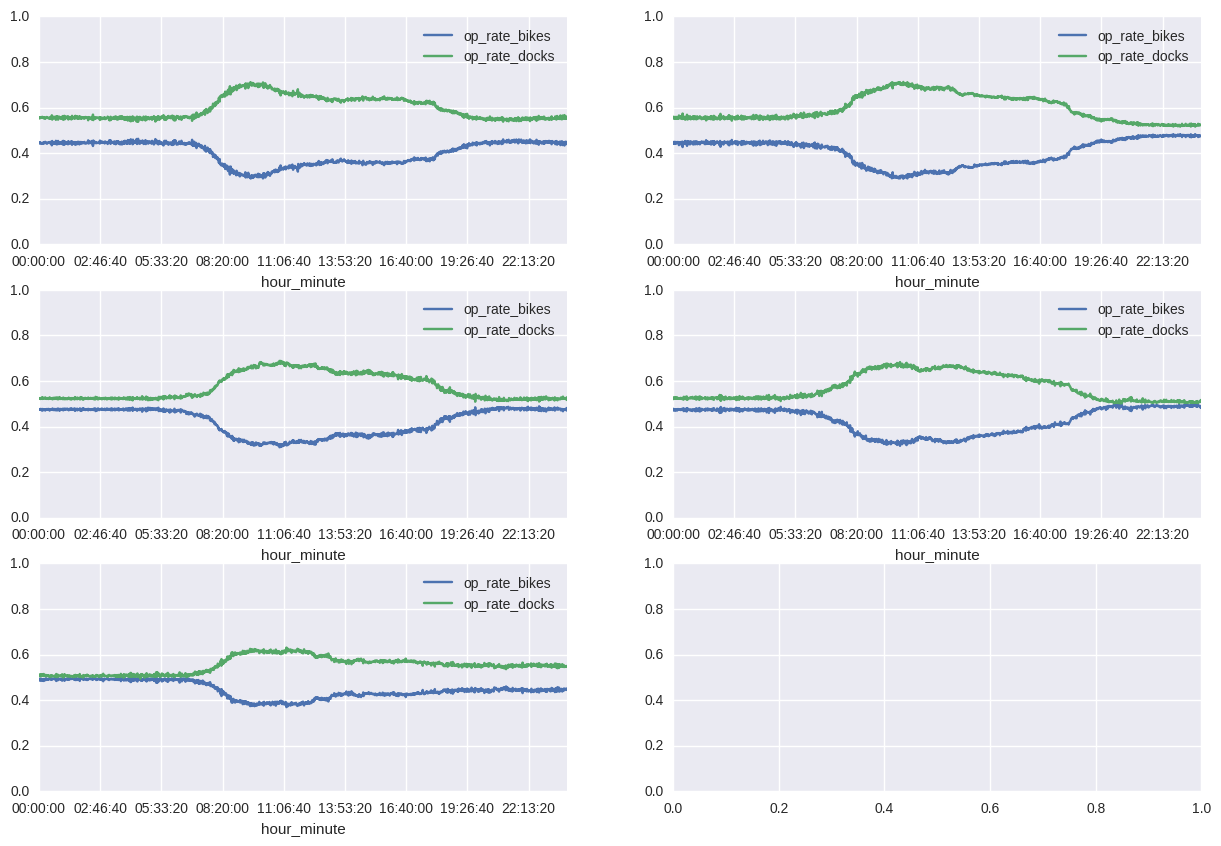

In [72]:
fig, axes = plt.subplots(3,2,figsize=(15,10))
dayofweeks = [0,1,2,3,4]
targets = zip(dayofweeks,axes.flatten())
for (dayofweek,ax) in targets:
    acerage_behavior_bikes_SFCH[acerage_behavior_bikes_SFCH.dayofweek==dayofweek].plot('hour_minute','op_rate_bikes',ax=ax)
    acerage_behavior_docks_SFCH[acerage_behavior_docks_SFCH.dayofweek==dayofweek].plot('hour_minute','op_rate_docks',ax=ax)
    ax.set_ylim([0,1])

In [73]:
status_start_low_SFCH['Date'] = status_start_low_SFCH['time'].apply(lambda x:x.date())

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [74]:
status_start_low_SFCH.head()

,station_id,bikes_available,docks_available,time,dayofweek,hour_minute,op_rate_bikes,op_rate_docks,Date
23263795,58,7,12,2015-09-01 00:00:02,1,00:00:00,0.368421,0.631579,2015-09-01
23263796,58,7,12,2015-09-01 00:01:02,1,00:01:00,0.368421,0.631579,2015-09-01
23263797,58,7,12,2015-09-01 00:02:02,1,00:02:00,0.368421,0.631579,2015-09-01
23263798,58,7,12,2015-09-01 00:03:03,1,00:03:00,0.368421,0.631579,2015-09-01
23263799,58,7,12,2015-09-01 00:04:02,1,00:04:00,0.368421,0.631579,2015-09-01


In [75]:
#ある一週間
any_data = status_start_low_SFCH[(status_start_low_SFCH.Date>=datetime.date(2015,9,14)) & (status_start_low_SFCH.Date<=datetime.date(2015,9,18))]

In [76]:
any_data.head()

,station_id,bikes_available,docks_available,time,dayofweek,hour_minute,op_rate_bikes,op_rate_docks,Date
23282515,58,6,13,2015-09-14 00:00:02,0,00:00:00,0.315789,0.684211,2015-09-14
23282516,58,6,13,2015-09-14 00:01:03,0,00:01:00,0.315789,0.684211,2015-09-14
23282517,58,6,13,2015-09-14 00:02:02,0,00:02:00,0.315789,0.684211,2015-09-14
23282518,58,6,13,2015-09-14 00:03:02,0,00:03:00,0.315789,0.684211,2015-09-14
23282519,58,6,13,2015-09-14 00:04:02,0,00:04:00,0.315789,0.684211,2015-09-14


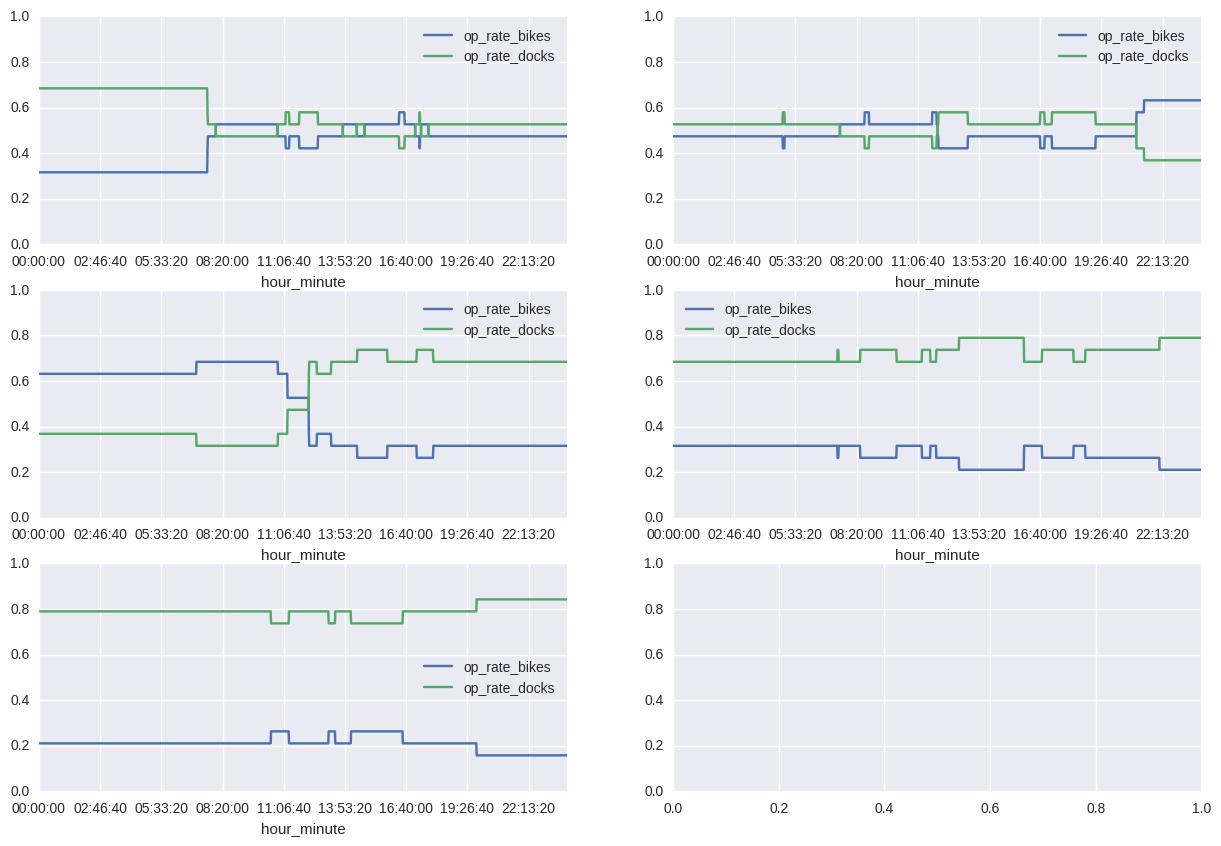

In [78]:
fig, axes = plt.subplots(3,2,figsize=(15,10))
dayofweeks = [0,1,2,3,4]
targets = zip(dayofweeks,axes.flatten())
for (dayofweek,ax) in targets:
    any_data[any_data.dayofweek==dayofweek].plot('hour_minute','op_rate_bikes',ax=ax)
    any_data[any_data.dayofweek==dayofweek].plot('hour_minute','op_rate_docks',ax=ax)
    ax.set_ylim([0,1])